# Mínimos Quadrados em Julia
> Nome: Davi dos Santos Mattos
> DRE: 119133049

## Exercício 3.1

### 1. Gerando 30 pontos para um polinômio de grau 5:
Uma função de grau 5 tem a seguinte cara: 
$f(x) = a_1 x^5 + a_2 x^4 + a_3 x^3 + a_4 x^2 + a_5 x + a_6$

Vamos utilizar o polinômio de grau 5 mais simples: $f(x) = x^5 -2 x^4  + 2 x^2 + x$

ou seja, tomando a matriz de coeficientes como $[1,  -2,   0,   2,   1,   0]$


In [19]:
function f(x)
    coef = [1   -2   0   2   1   0] #definindo os coeficientes da função
    y = coef[1].* x .^5 .+ coef[2].* x.^4 .+ coef[3].* x.^3 .+ coef[4].*x.^2 .+ coef[5] .* x .+ coef[6] #calculando a função
    return y
end

using Random
Random.seed!(14) #Garantindo que todos os número gerado sejam gerados apenas uma vez

x = transpose(rand(-2:0.1:3,1,30))
#ruido = randn(length(x)) .* rand()^rand()
y = f(x) #.+ ruido

30×1 Matrix{Float64}:
  12.864810000000004
  -0.12351999999999999
  21.275229999999997
   4.098560000000003
  -0.14143999999999995
   1.36787
  43.53856000000002
 -20.072960000000005
  -4.95552
  34.53125
   ⋮
  -0.21696
  83.37528999999995
  -0.08021
   7.816789999999999
   0.6790400000000001
   4.098560000000003
   0.27712000000000003
   1.13856
   1.7982900000000002

Para evitar overflow por conta de número extremamente grandes, ou extremamente pequenos, vamos escolher aleatóriamente 30 números dentro do intervalo $[-2,3]$, a cada $0.1$ unidade, rodando o código obtivemos os seguitnes pontos gerados

In [20]:
for (xi, yi) in zip(x, y)
    @show xi, yi
end

(xi, yi) = (2.1, 12.864810000000004)
(xi, yi) = (-0.2, -0.12351999999999999)
(xi, yi) = (2.3, 21.275229999999997)
(xi, yi) = (1.6, 4.098560000000003)
(xi, yi) = (-0.4, -0.14143999999999995)
(xi, yi) = (0.7, 1.36787)
(xi, yi) = (2.6, 43.53856000000002)
(xi, yi) = (-1.6, -20.072960000000005)
(xi, yi) = (-1.2, -4.95552)
(xi, yi) = (2.5, 34.53125)
(xi, yi) = (-1.6, -20.072960000000005)
(xi, yi) = (0.2, 0.27712000000000003)
(xi, yi) = (1.1, 2.20231)
(xi, yi) = (1.0, 2.0)
(xi, yi) = (-1.6, -20.072960000000005)
(xi, yi) = (-0.8, -0.6668800000000001)
(xi, yi) = (-0.7, -0.36827)
(xi, yi) = (2.6, 43.53856000000002)
(xi, yi) = (1.6, 4.098560000000003)
(xi, yi) = (-0.3, -0.13863)
(xi, yi) = (2.9, 83.37528999999995)
(xi, yi) = (-0.6, -0.21696)
(xi, yi) = (2.9, 83.37528999999995)
(xi, yi) = (-0.1, -0.08021)
(xi, yi) = (1.9, 7.816789999999999)
(xi, yi) = (0.4, 0.6790400000000001)
(xi, yi) = (1.6, 4.098560000000003)
(xi, yi) = (0.2, 0.27712000000000003)
(xi, yi) = (0.6, 1.13856)
(xi, yi) = (0.9, 1.798

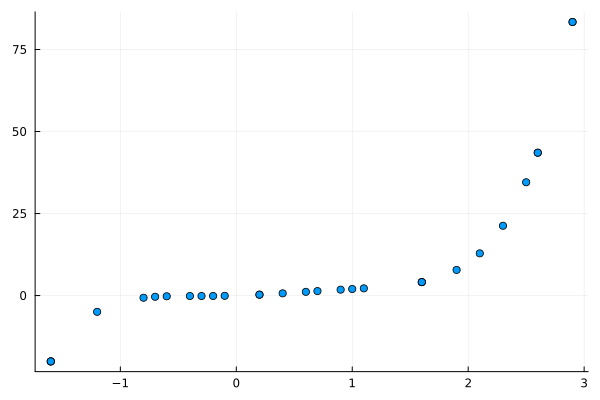

In [21]:
using Plots

gr(size = (600,400))
plot(rand(3),rand(3))
scatter!(rand(3),rand(3))
nothing

scatter(x,y, leg=false)

### 2. Regressão polinomial com polinômio de grau 0 até 29

In [22]:
using LinearAlgebra

function mq(x, y, F)
    n = length(x)
    p = length(F)
    M = zeros(p,p)
    c = zeros(p)
    for j in 1:p
        for k in 1:p
            M[j,k] = sum( F[j](x[i]) * F[k](x[i]) for i in 1:n)
        end
        c[j]= sum(y[i] * F[j](x[i]) for i in 1:n)
    end
    A = M \ c
    h(x) = sum(F[j](x) * A[j] for j in 1:p)
    return A, h
end

graus = 29
erros = []

for grau in 0:graus
    F = [x -> x^j for j in 0:grau]
    A, modelo = mq(x, y, F)
    r = y - modelo.(x)
    sqr = norm(r)^2
    push!(erros, sqr)
    println("Grau: $grau - Erro: $sqr")
end



Grau: 0 - Erro: 18150.12168075093
Grau: 1 - Erro: 6585.677236995198
Grau: 2 - Erro: 4169.682497975304
Grau: 3 - Erro: 499.30817916896325
Grau: 4 - Erro: 193.89505960319036
Grau: 5 - Erro: 5.2220182690692997e-23
Grau: 6 - Erro: 4.154635247981037e-22
Grau: 7 - Erro: 1.2969781443061203e-21
Grau: 8 - Erro: 2.877683244593473e-21
Grau: 9 - Erro: 3.505983972268059e-20
Grau: 10 - Erro: 3.1371418865383906e-18
Grau: 11 - Erro: 1.5718308953689274e-17
Grau: 12 - Erro: 1.628491751197549e-16
Grau: 13 - Erro: 1.1345703918564367e-14
Grau: 14 - Erro: 2.4999961439381716e-13
Grau: 15 - Erro: 3.674633926168179e-12
Grau: 16 - Erro: 6.523809264045365e-12
Grau: 17 - Erro: 1.7029877568844503e-11
Grau: 18 - Erro: 2.2354977634995093e-10
Grau: 19 - Erro: 1.2506060182862142e-10
Grau: 20 - Erro: 3.684133287835922e-12
Grau: 21 - Erro: 1.250649861277679e-10
Grau: 22 - Erro: 4.046645413293742e-9
Grau: 23 - Erro: 2.288829100748234e-11
Grau: 24 - Erro: 1.0498726984132813e-9
Grau: 25 - Erro: 2.252579775903048e-9
Grau: 2

## 3.1.3

É possivel sim, realizar regressão com polinômio de grau maior que 29, porém depende de o quão grande o grau desse polinômio é, poois a partir de certo grau o custo computacional se torna muito alto e no Julia, o código tende a rodar por alguns minutos e retornar com um erro, mas podemos também observar que o erro começa a oscilar muito, o que indica fortemente que o problema ja foi resolvido e está instável.

In [23]:
graus = 500

for grau in 0:graus
    F = [x -> x^j for j in 0:grau]
    A, modelo = mq(x, y, F)
    r = y - modelo.(x)
    sqr = norm(r)^2
    println("Grau: $grau - Erro: $sqr")
end


Grau: 0 - Erro: 18150.12168075093
Grau: 1 - Erro: 6585.677236995198
Grau: 2 - Erro: 4169.682497975304
Grau: 3 - Erro: 499.30817916896325
Grau: 4 - Erro: 193.89505960319036
Grau: 5 - Erro: 5.2220182690692997e-23
Grau: 6 - Erro: 4.154635247981037e-22
Grau: 7 - Erro: 1.2969781443061203e-21
Grau: 8 - Erro: 2.877683244593473e-21
Grau: 9 - Erro: 3.505983972268059e-20
Grau: 10 - Erro: 3.1371418865383906e-18
Grau: 11 - Erro: 1.5718308953689274e-17
Grau: 12 - Erro: 1.628491751197549e-16
Grau: 13 - Erro: 1.1345703918564367e-14
Grau: 14 - Erro: 2.4999961439381716e-13
Grau: 15 - Erro: 3.674633926168179e-12
Grau: 16 - Erro: 6.523809264045365e-12
Grau: 17 - Erro: 1.7029877568844503e-11
Grau: 18 - Erro: 2.2354977634995093e-10
Grau: 19 - Erro: 1.2506060182862142e-10
Grau: 20 - Erro: 3.684133287835922e-12
Grau: 21 - Erro: 1.250649861277679e-10
Grau: 22 - Erro: 4.046645413293742e-9
Grau: 23 - Erro: 2.288829100748234e-11
Grau: 24 - Erro: 1.0498726984132813e-9
Grau: 25 - Erro: 2.252579775903048e-9
Grau: 2

ArgumentError: ArgumentError: matrix contains Infs or NaNs

## 3.1.4

In [24]:
graus = 50
erros = []

for grau in 0:graus
    F = [x -> x^j for j in 0:grau]
    A, modelo = mq(x, y, F)
    r = y - modelo.(x)
    sqr = norm(r)^2
    push!(erros, sqr)
    println("Grau: $grau - Erro: $sqr")
end


Grau: 0 - Erro: 18150.12168075093
Grau: 1 - Erro: 6585.677236995198
Grau: 2 - Erro: 4169.682497975304
Grau: 3 - Erro: 499.30817916896325
Grau: 4 - Erro: 193.89505960319036
Grau: 5 - Erro: 5.2220182690692997e-23
Grau: 6 - Erro: 4.154635247981037e-22
Grau: 7 - Erro: 1.2969781443061203e-21
Grau: 8 - Erro: 2.877683244593473e-21
Grau: 9 - Erro: 3.505983972268059e-20
Grau: 10 - Erro: 3.1371418865383906e-18
Grau: 11 - Erro: 1.5718308953689274e-17
Grau: 12 - Erro: 1.628491751197549e-16
Grau: 13 - Erro: 1.1345703918564367e-14
Grau: 14 - Erro: 2.4999961439381716e-13
Grau: 15 - Erro: 3.674633926168179e-12
Grau: 16 - Erro: 6.523809264045365e-12
Grau: 17 - Erro: 1.7029877568844503e-11
Grau: 18 - Erro: 2.2354977634995093e-10
Grau: 19 - Erro: 1.2506060182862142e-10
Grau: 20 - Erro: 3.684133287835922e-12
Grau: 21 - Erro: 1.250649861277679e-10
Grau: 22 - Erro: 4.046645413293742e-9
Grau: 23 - Erro: 2.288829100748234e-11
Grau: 24 - Erro: 1.0498726984132813e-9
Grau: 25 - Erro: 2.252579775903048e-9
Grau: 2

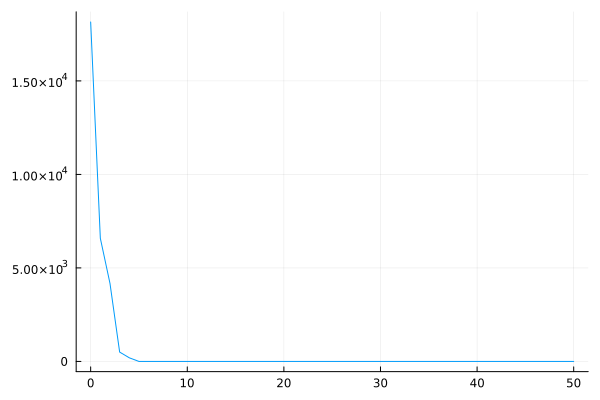

In [25]:

using Plots
plot(0:graus, erros,legend=false)


Observando o gráfico acima, podemos perceber que a medida que o grau do polinômio aumenta, o erro tende a 0. O que por sua vez é o esperado, pois quando utilizamos mínimos quadrados para tentar achar uma curva que melhor se aproxima dos pontos, nós estamos, na verdade diminuindo o erro. 

## 3.2  Ranking dos Filmes